# COMP3115: Exploratory Data Analysis and Visualization

# Lab 7: Data Classification Using Perceptron and Artificial Neural Network

# Scikit-learn: Machine Learning in Python

Scikit-learn is a free, simple and efficient predictive data analytics library which allows you to develop data analytics and machine learning algorithms in Python. It is built on Pandas and Numpy, and supports a large variety of classification, regression and clustering algorithms. In this lab, we will learn to make use of algorithms provided by scikit-learn to carry out data analytics tasks.

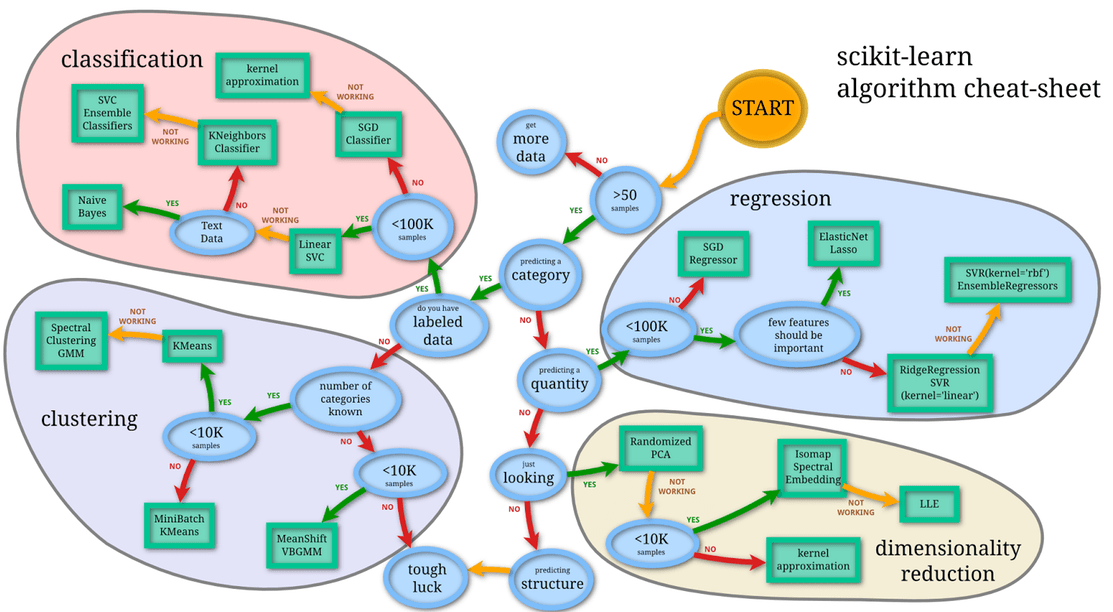

# Classification

Given a data set with pairs of input feature vector and output label, a classification model (also called classifier) can be learned. There are different classification models that you can try, including perceptron, support vector machine, multiple layer perceptron, k-nearest neighbors, etc. 

## Data Set

In this lab exercise, we make use a dataset which is called "iris". It contains four input attributes/features corresponding to a particular species of iris, including length of sepal, width of sepal, length of petal, and width of petal. It also contains labels specifying the particular species of the iris. Note that this dataset is commonly used by the machine learning community for benchmarking.

### Importing data from file

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('iris.csv')
print(df.head())
print('Different species: ',df.species.unique())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Different species:  ['setosa' 'versicolor' 'virginica']


## Perceptron

### Data preparation, model training, and model testing

The following code divides the data set into 80% for training and 20% for testing. The splitting is done randomly with a fixed seed for the random number generator. Then, use it to train and then test a perceptron model for classification.

In [6]:
from sklearn.linear_model import Perceptron

# Suppose we want to classify if an iris is either `setosa` or `virginica` or not. Prepare data into right format
# by labeling them as +1 and `versicolor` as -1. 
X = df.drop(['species'], axis=1).values # drop the species column and leave only the remaining as input
y = np.ones(df.shape[0]) # set all to 1
y[df['species']=='versicolor'] = -1 # set the versicolor to -1

# Split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Construct the perceptron
ppn = Perceptron(max_iter=400)

# Train the perceptron
ppn.fit(X_train, y_train)

# Test the perceptron
y_pred = ppn.predict(X_test)

print('Accuracy: {0:.2g}'.format(sum(y_test == y_pred)/len(y_pred)))

Accuracy: 0.83


## 1.3 Artificial Neural Network (ANN) - Multiple Layer Perceptron (MLP)

Multiple Layer Perceptron is an artificial neural network with multiple layers of activation functions (neurons).

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Construct MLP model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 200), activation='relu', learning_rate_init = 0.01, max_iter=400)

# Obtain accuracy based on 5-fold cross-validation
cv_accuracy = cross_val_score(mlp_classifier, X, y, scoring='accuracy', cv = 5)
y_pred = cross_val_predict(mlp_classifier, X, y, cv = 5)

print('accuracy (per fold)= ', cv_accuracy)
print('accuracy (average)= ', round(cv_accuracy.mean(),3),'(',round(cv_accuracy.std(),3),')')

tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print('\nConfusion Matrix:')
print('=================')
print('TN=',tn, 'FP=', fp, 'FN=', fn, 'TP=', tp)
print('Recall/Sensitivity= ',round(tp/(tp+fn),3))
print('Specificity= ', round(tn/(tn+fp),3))
print('Precision= ', round(tp/(tp+fp),3))

accuracy (per fold)=  [1.         1.         0.96666667 0.93333333 0.93333333]
accuracy (average)=  0.967 ( 0.03 )

Confusion Matrix:
TN= 49 FP= 1 FN= 3 TP= 97
Recall/Sensitivity=  0.97
Specificity=  0.98
Precision=  0.99
